# Medical Insurance Charges Analysis

This project analyzes medical insurance cost data to identify the key drivers of insurance charges.
The dataset includes demographic and lifestyle factors such as age, BMI, smoking status, region, and number of children.

The main goal is to explore patterns in the data and extract insights that could support pricing strategies in the insurance industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("/Users/zohrehsamieekadkani/Desktop/books/python-files/Abgabe/medicall.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Data Overview
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Missing Values & Duplicates
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.duplicated().sum()


np.int64(1)

In [ ]:
#Summary Statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


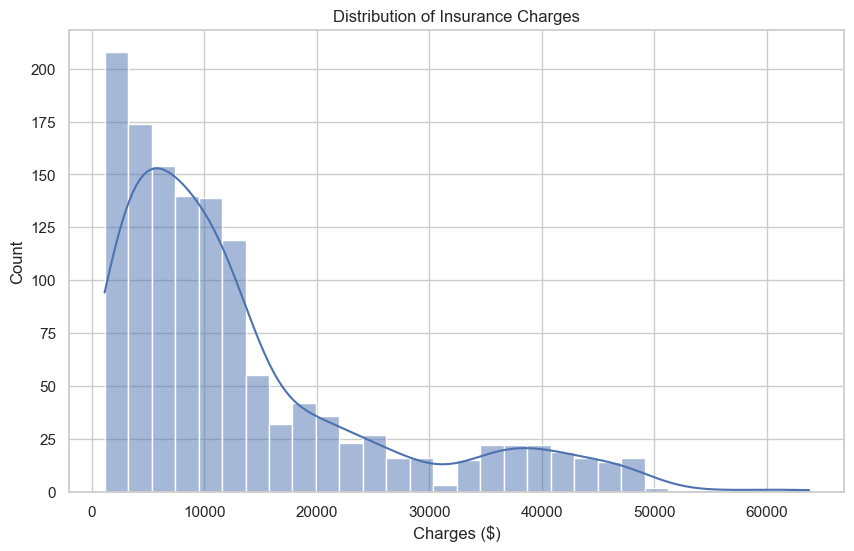

In [ ]:
#Distribution of Charges
plt.figure(figsize=(10,6))
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges ($)")
plt.ylabel("Count")
plt.show()

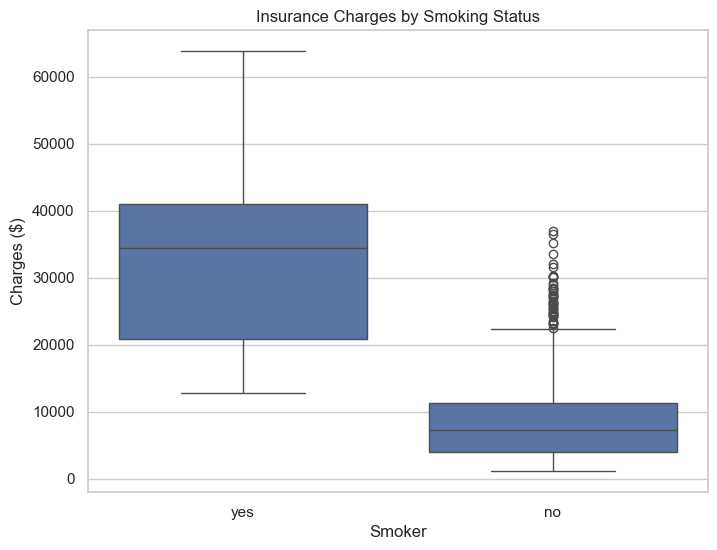

In [ ]:
#Smoker vs Non-Smoker Charges
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges ($)")
plt.show()

In [15]:
#Average Charges Comparison (Smoker vs Non-Smoker)
smoker_mean = df.groupby("smoker")["charges"].mean()
smoker_mean

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [16]:
difference_percent = ((smoker_mean["yes"] - smoker_mean["no"]) / smoker_mean["no"]) * 100
print(f"Smokers pay {difference_percent:.1f}% more on average.")

Smokers pay 280.0% more on average.


In [18]:
#Correlation Analysis
numeric_cols = ["age", "bmi", "children", "charges"]
corr = df[numeric_cols].corr()["charges"].drop("charges").sort_values(ascending=False)
corr

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

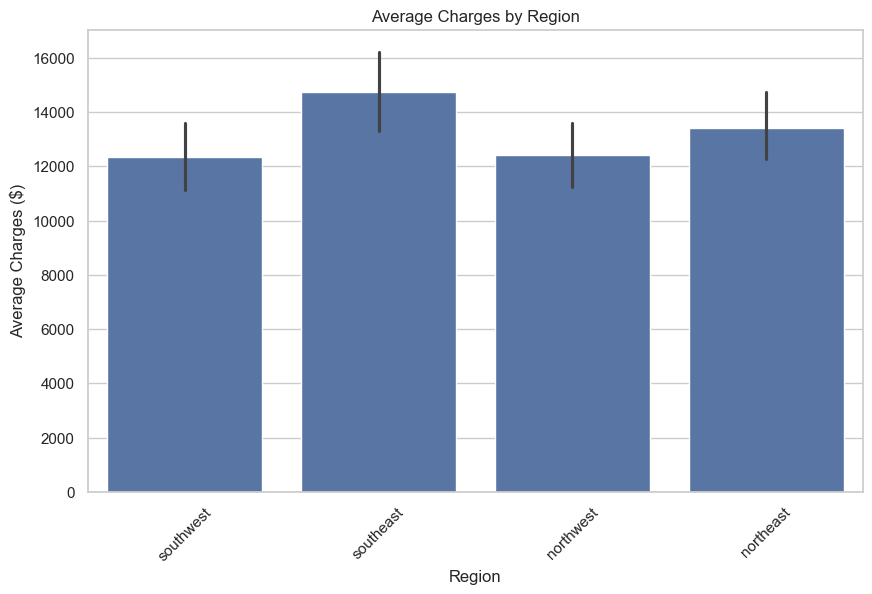

In [19]:
#Average Charges by Region
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="region", y="charges", estimator="mean")
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges ($)")
plt.xticks(rotation=45)
plt.show()

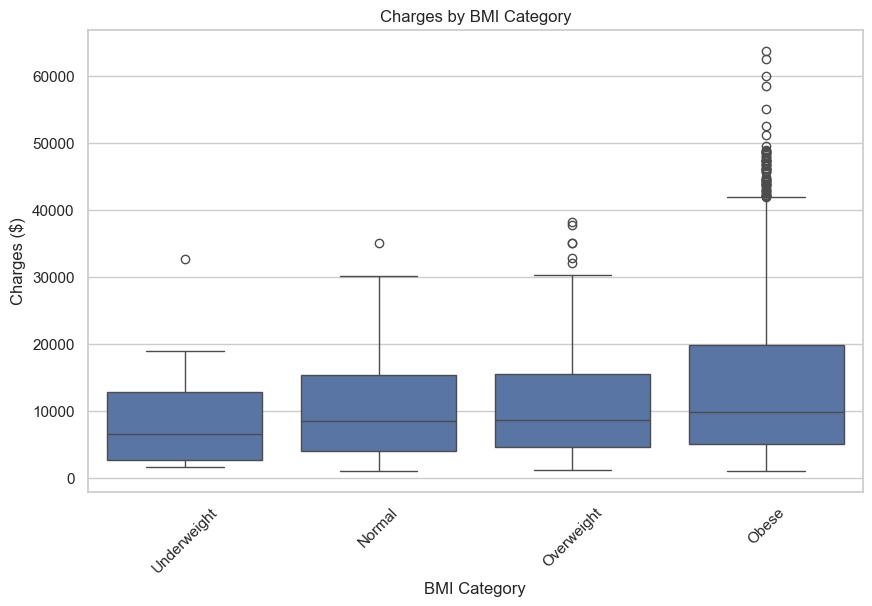

In [20]:
#BMI Categories Analysis
df_analysis = df.copy()

df_analysis["bmi_category"] = pd.cut(
    df_analysis["bmi"],
    bins=[0, 18.5, 24.9, 29.9, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_analysis, x="bmi_category", y="charges")
plt.title("Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges ($)")
plt.xticks(rotation=45)
plt.show()

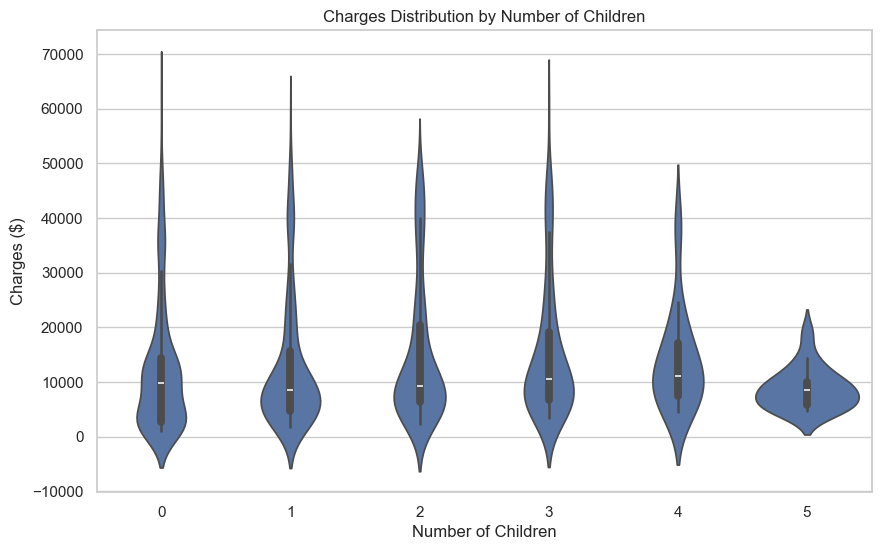

In [21]:
#Charges vs Children
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="children", y="charges")
plt.title("Charges Distribution by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Charges ($)")
plt.show()


# Key Insights

- Smoking is the strongest factor affecting insurance charges.
- Smokers pay significantly higher charges compared to non-smokers.
- Age has a moderate positive correlation with charges.
- BMI also has a positive correlation with charges.
- Southeast region shows the highest average insurance charges.
- Obese category tends to have higher insurance costs.

# Conclusion

This analysis highlights smoking status as the most significant driver of insurance charges.
The insights from this project could support insurance companies in designing risk-based pricing models.